<a href="https://colab.research.google.com/github/lumab23/analise-grafos-hamiltonianos/blob/main/Trabalho_2_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

O Teorema de Dirac é uma condição suficiente para um grafo ser Hamiltoniano. Ele diz que:

se um grafo G com n vértices (onde n ≥ 3) tem um grau mínimo δ(G)≥n/2, então G é Hamiltoniano. Ou seja, o grau do vértice "mais fraco" (com menos conexões) já precisa ser pelo menos metade do número de vértices.

In [ ]:
def teorema_dirac(grafo):
  tamanho = len(grafo.nodes())

  if tamanho < 3:
    return False, "o grafo não se encaixa no teorema, por o número de vértices é menor que 3"

  lista_graus = []

  for no, grau in grafo.degree():
    lista_graus.append(grau)

  grau_min = min(lista_graus)

  if grau_min >= tamanho / 2:
    msg = f"A condição é satisfeita, pois o grau mínimo ({grau_min}) é maior ou igual a n/2 ({tamanho / 2:.1f})."
    return True, msg
  else:
    msg = f"O teorema não garante, pois o grau mínimo ({grau_min}) é menor que n/2 ({tamanho / 2:.1f})."
    return False, msg

O Teorema de Ore generaliza o de Dirac. Ele afirma que:

soma dos nós não vizinhos tem que ser pelo menos N

In [ ]:
def teorema_ore(grafo):
    tamanho = len(grafo.nodes())
    if tamanho < 3:
        return False, "o grafo não se encaixa no teorema, pois n < 3"

    for u in grafo.nodes():
        for v in grafo.nodes():
            if u != v and not grafo.has_edge(u, v):
                soma_graus = grafo.degree(u) + grafo.degree(v)

                if soma_graus < tamanho:
                    msg = (f"O teorema não garante, pois para o par não adjacente ({u}, {v}), "
                           f"a soma dos graus ({soma_graus}) é menor que n ({tamanho}).")
                    return False, msg

    msg = f"A condição é satisfeita. Todos os pares não adjacentes (u, v) cumprem d(u) + d(v) >= n ({tamanho})."
    return True, msg

## Bondy Chvatal
verifica os nós não vizinhos, soma os graus deles. Se a soma for pelo menos N, coloca aresta.

Repita o processo até que nenhuma aresta nova possa ser adicionada.

In [ ]:
def teorema_bondy_chvatal(grafo):
    tamanho = len(grafo.nodes())
    if tamanho < 3:
        return False, "o grafo não se encaixa no teorema, pois n < 3"

    # cria uma cópia para não alterar o grafo original
    fecho = grafo.copy()

    mudou = True
    while mudou:
        mudou = False
        for u in fecho.nodes():
            for v in fecho.nodes():
                if u != v and not fecho.has_edge(u, v):
                    if fecho.degree(u) + fecho.degree(v) >= tamanho:
                        fecho.add_edge(u, v)
                        mudou = True

    # se o fecho é completo, então é Hamiltoniano
    if all(fecho.has_edge(u, v) for u in fecho.nodes() for v in fecho.nodes() if u != v):
      msg = "O teorema é satisfeito, pois o fecho do grafo é um grafo completo."
      return True, msg
    else:
      msg = "O teorema não garante, pois o fecho do grafo não se tornou um grafo completo."
      return False, msg


## Grafo 1

In [ ]:
G = nx.Graph()

In [ ]:
G.add_nodes_from(range(1, 8))

In [ ]:
G.add_edges_from([
    (1, 2), (1, 7), (1, 3), (1, 6),
    (2, 3), (2, 5), (2, 7),
    (3, 4), (3, 5),
    (4, 5), (4, 6), (4, 7),
    (5, 6),
    (6, 7)
])

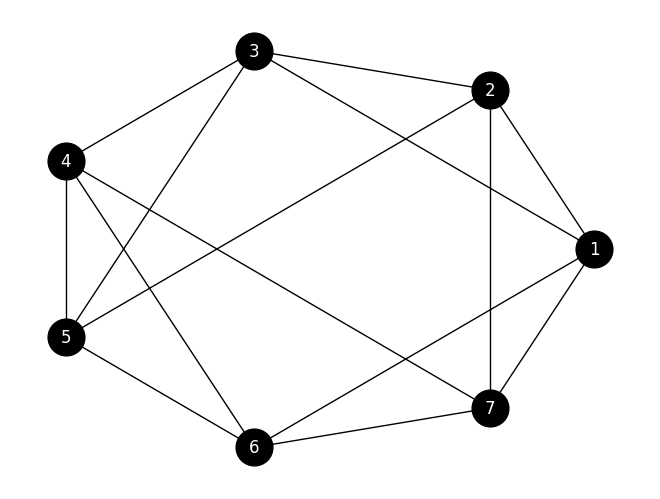

In [ ]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color="black", node_size=700, font_color="white")
plt.show()

In [ ]:
print("Dirac:", teorema_dirac(G))
print("Ore:", teorema_ore(G))
print("Bondy-Chvátal:", teorema_bondy_chvatal(G))

Dirac: (True, 'A condição é satisfeita, pois o grau mínimo (4) é maior ou igual a n/2 (3.5).')
Ore: (True, 'A condição é satisfeita. Todos os pares não adjacentes (u, v) cumprem d(u) + d(v) >= n (7).')
Bondy-Chvátal: (True, 'O teorema é satisfeito, pois o fecho do grafo é um grafo completo.')


# Grafo 2


In [ ]:
grafo_dois = nx.Graph()

In [ ]:
grafo_dois.add_nodes_from(range(1, 8))

In [ ]:
grafo_dois.add_edges_from([
    (1, 2), (1, 7), (1, 3),
    (2, 3), (2, 5), (2, 7),
    (3, 4), (3, 5),
    (4, 5), (4, 6), (4, 7),
    (5, 6),
    (6, 7)
])


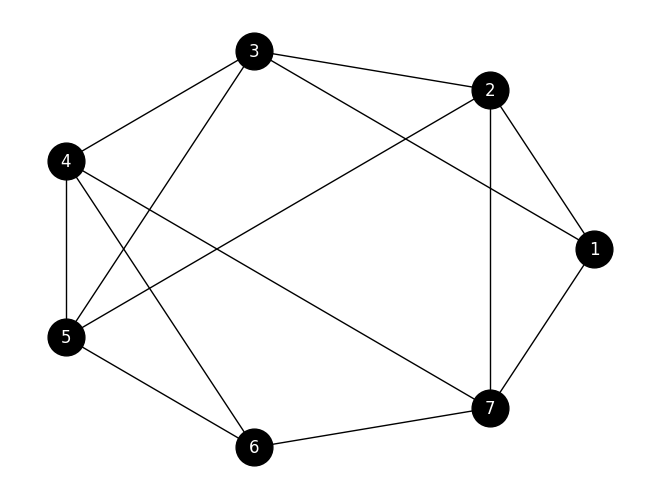

In [ ]:
pos = nx.circular_layout(grafo_dois)
nx.draw(grafo_dois, pos, with_labels=True, node_color="black", node_size=700, font_color="white")
plt.show()

In [ ]:
print("Análise do Grafo da Imagem:")
print("-" * 30)

dirac_ok, dirac_msg = teorema_dirac(grafo_dois)
print(f"Dirac: {dirac_ok} {dirac_msg}")

ore_ok, ore_msg = teorema_ore(grafo_dois)
print(f"Ore: {ore_ok} {ore_msg}")

bc_ok, bc_msg = teorema_bondy_chvatal(grafo_dois)
print(f"Bondy-Chvátal: {bc_ok} {bc_msg}")


Análise do Grafo da Imagem:
------------------------------
Dirac: False O teorema não garante, pois o grau mínimo (3) é menor que n/2 (3.5).
Ore: False O teorema não garante, pois para o par não adjacente (1, 6), a soma dos graus (6) é menor que n (7).
Bondy-Chvátal: True O teorema é satisfeito, pois o fecho do grafo é um grafo completo.


# Grafo 3

In [ ]:
grafo_tres = nx.Graph()

In [ ]:
grafo_tres.add_nodes_from(range(1, 8))

In [ ]:
grafo_tres.add_edges_from([
    (1, 2), (1, 7), (1, 3), (1, 6),
    (2, 3), (2, 4),
    (3, 4),
    (4, 5),
    (5, 6),
    (6, 7)
])

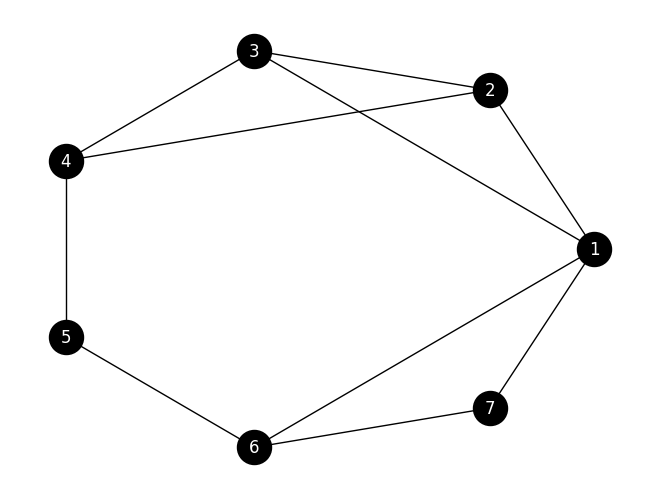

In [ ]:
pos = nx.circular_layout(grafo_tres)
nx.draw(grafo_tres, pos, with_labels=True, node_color="black", node_size=600, font_color="white")
plt.show()

In [ ]:
print("Análise do Novo Grafo:")
print("-" * 30)

dirac_ok, dirac_msg = teorema_dirac(grafo_tres)
print(f"Dirac: {dirac_ok} {dirac_msg}")

ore_ok, ore_msg = teorema_ore(grafo_tres)
print(f"Ore: {ore_ok} {ore_msg}")

bc_ok, bc_msg = teorema_bondy_chvatal(grafo_tres)
print(f"Bondy-Chvátal: {bc_ok} {bc_msg}")

Análise do Novo Grafo:
------------------------------
Dirac: False O teorema não garante, pois o grau mínimo (2) é menor que n/2 (3.5).
Ore: False O teorema não garante, pois para o par não adjacente (1, 5), a soma dos graus (6) é menor que n (7).
Bondy-Chvátal: True O teorema é satisfeito, pois o fecho do grafo é um grafo completo.


# Grafo 4

In [ ]:
grafo_quatro = nx.Graph()

In [ ]:
grafo_quatro.add_nodes_from(range(1, 8))

In [ ]:
grafo_quatro.add_edges_from([
    (1, 2), (1, 7), (1, 3), (1, 6),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (6, 7)
])

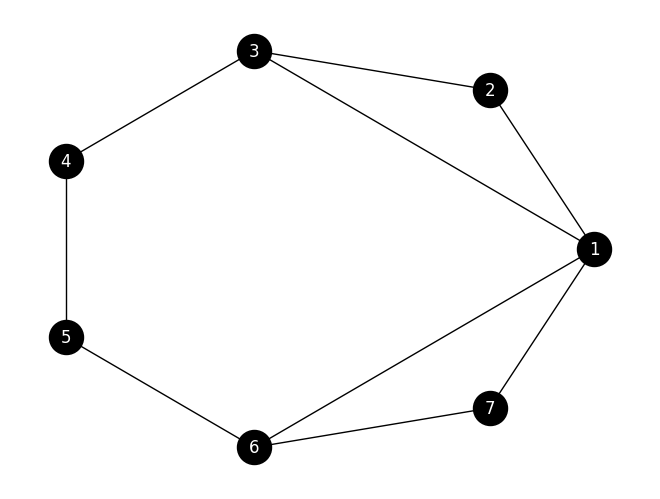

In [ ]:
pos = nx.circular_layout(grafo_quatro)
nx.draw(grafo_quatro, pos, with_labels=True, node_color="black", node_size=600, font_color="white")
plt.show()

In [ ]:
print("Análise do Quarto Grafo:")
print("-" * 30)

dirac_ok, dirac_msg = teorema_dirac(grafo_quatro)
print(f"Dirac: {dirac_ok} {dirac_msg}")

ore_ok, ore_msg = teorema_ore(grafo_quatro)
print(f"Ore: {ore_ok} {ore_msg}")

bc_ok, bc_msg = teorema_bondy_chvatal(grafo_quatro)
print(f"Bondy-Chvátal: {bc_ok} {bc_msg}")

Análise do Quarto Grafo:
------------------------------
Dirac: False O teorema não garante, pois o grau mínimo (2) é menor que n/2 (3.5).
Ore: False O teorema não garante, pois para o par não adjacente (1, 4), a soma dos graus (6) é menor que n (7).
Bondy-Chvátal: False O teorema não garante, pois o fecho do grafo não se tornou um grafo completo.
